<a href="https://colab.research.google.com/github/SantiagoGil93/Proyecto_BootCamp/blob/main/Proyecto_Final_BootCamp_TalentoTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de la Prevalencia de Enfermedades Mentales entre 1990 y 2019
Presentado por: Santiago Gil Bossa

## Indice
1. [Introducción](#introduccion)
2. [Inspección inicial de los datos](#inspeccion_inicial)
    - 2.1. [Importación de las librerias y de los DataFrames](#librerias)
    - 2.2. [Exploración del DataFrame de prevalencia por paises](#exploracion_paises)
    - 2.3. [Exploración del DataFrame de prevalencia por región](#exploracion_region)
3. [Análisis exploratorio de los datos](#eda)
    - 3.1. [Análisis exploratorio de la prevalencia por paises](#eda_paises)
        - 3.1.1 [Datos estadísticos](#estadisticos_paises)
        - 3.1.2 [Visualización de la distribución](#distribucion_paises)
        - 3.1.3 [Visualización de Boxplots](#boxplots_paises)  
        - 3.1.4 [Evolución temporal](#temporal_paises)
        - 3.1.5 [Mapa de color](#mapa_paises)
    - 3.2. [Análisis exploratorio de la prevalencia por region](#eda_region)
        - 3.2.1 [Datos estadísticos](#estadisticos_region)
        - 3.2.2 [Visualización de la distribución](#distribucion_region)
        - 3.2.3 [Visualización de Boxplots](#boxplots_region)  
        - 3.2.4 [Evolución temporal](#temporal_region)
4. [Análisis bivariado](#analisis_bivariado)
    - 4.1. [Análisis de correlación de los trastornos por paises](#correlacion_paises)
        - 4.1.1. [Valores de correlación entre el trastorno bipolar y los trastornos alimenticios](#correlacion_bipo_alim)
        - 4.1.2. [Gráfico de dispersión entre el trastorno bipolar y los trastornos alimenticios](#dispersion_bipo_alim)
        - 4.1.3. [Regresión lineal entre el trastorno bipolar y los trastornos alimenticios](#lineal_bipo_alim)
    - 4.2. [Análisis de correlación de los trastornos por regiones](#correlacion_region)        
        - 4.1.1. [Valores de correlación entre el trastorno bipolar y los trastornos de ansiedad](#correlacion_bipo_ansi)
        - 4.1.2. [Gráfico de dispersión entre el trastorno bipolar y los trastornos de ansiedad](#dispersion_bipo_ansi)
        - 4.1.3. [Regresión lineal entre el trastorno bipolar y los trastornos alimenticios](#lineal_bipo_ansi)
5. [Análisis de los datos de Colombia](#analisis_col)
    - 5.1 [Análisis exploratorio de los datos](#eda_col)
        - 5.1.1 [Datos estadísticos](#estadisticos_col)
        - 5.1.2. [Visualización de la distribución](#distribucion_col)
        - 5.1.3 [Visualización de Boxplots](#boxplots_col)
        - 5.1.4 [Evolución temporal](#temporal_col)
    - [5.2 Análisis Bivariado](#bivariado_col)
        - 5.2.1 [Análisis de correlación de los trastornos](#correlacion_col)
        - 5.2.2. [Valores de correlación entre los trastornos esquizofrénicos y los trastornos alimenticios](#val_correlacion_col)
        - 5.2.3. [Gráfico de dispersión entre el trastornos esquizofrénicos y los trastornos alimenticios](#dispercion_col)
        - 5.2.4. [Regresión lineal entre los trastornos esquizofrénicos y los trastornos alimenticios](#regresion_col)
6. [Maching learning](#maching_learning)
7. [Limitaciones](#limitaciones)
8. [Conclusiones](#conclusiones)


## 1. Introducción <a name="introduccion"></a>


## 2. Inspección Inicial de los datos
<a name="inspeccion_inicial"></a>

### 2.1. Importación de las librerias y de los DataFrames
<a name="librerias"></a>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression

df_country = pd.read_csv('https://raw.githubusercontent.com/SantiagoGil93/Proyecto_BootCamp/main/data/mental-illnesses-prevalence-countries.csv')
df_region = pd.read_csv('https://raw.githubusercontent.com/SantiagoGil93/Proyecto_BootCamp/main/data/mental-illnesses-prevalence-region.csv')

### 2.2. Exploración del DataFrame de prevalencia por paises
<a name="exploracion_paises"></a>

In [ ]:
# Ver las primeras filas del DataFrame
df_country.head()

,Country,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [ ]:
# Información general sobre el DataFrame
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  6150 non-null   object 
 1   Code                     6150 non-null   object 
 2   Year                     6150 non-null   int64  
 3   Schizophrenia disorders  6150 non-null   float64
 4   Depressive disorders     6150 non-null   float64
 5   Anxiety disorders        6150 non-null   float64
 6   Bipolar disorders        6150 non-null   float64
 7   Eating disorders         6150 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 384.5+ KB


In [ ]:
# Revisamos los valores en la columna Country
df_country['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', '

In [ ]:
# Revisamos los valores en la columna Year
df_country['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [ ]:
# Descripción estadística de las columnas numéricas
df_country.describe()

,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
count,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000
mean,2004.500000,0.266031,3.766168,4.098702,0.638366,0.194945
std,8.656145,0.039258,0.939617,1.060642,0.235506,0.139051
min,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,1997.000000,0.241982,3.063132,3.425237,0.521153,0.095748
50%,2004.500000,0.272983,3.642872,3.939547,0.579017,0.144325
75%,2012.000000,0.285912,4.369088,4.539975,0.853304,0.242860
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688


Al revisar el DataFrame, observamos que los datos corresponden a la prevalencia de 5 trastornos mentales, esquizofrenia, depresión, ansiedad, trastorno bipolar y trastornos alimenticios en todos los países del mundo. La tabla refleja información de 30 años, comprendidos entre 1990 y 2019.
No se presentan valores nulos y hay un total de 8 columnas y 6150 registros.




### 2.2. Exploración del DataFrame de prevalencia por región
<a name="exploracion_region"></a>

In [ ]:
# Ver las primeras filas del DataFrame
df_region.head()

,Region,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Africa (IHME GBD),1990,0.219527,4.602806,3.696839,0.607027,0.111027
1,Africa (IHME GBD),1991,0.219559,4.598041,3.695416,0.607090,0.110425
2,Africa (IHME GBD),1992,0.219579,4.593013,3.693819,0.607127,0.109845
3,Africa (IHME GBD),1993,0.219583,4.588568,3.692097,0.607134,0.109305
4,Africa (IHME GBD),1994,0.219556,4.586263,3.690115,0.607082,0.108813


In [ ]:
# Información general sobre el DataFrame
df_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Region                   270 non-null    object 
 1   Year                     270 non-null    int64  
 2   Schizophrenia disorders  270 non-null    float64
 3   Depressive disorders     270 non-null    float64
 4   Anxiety disorders        270 non-null    float64
 5   Bipolar disorders        270 non-null    float64
 6   Eating disorders         270 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 14.9+ KB


In [ ]:
# Descripción estadística de las columnas numéricas
df_region.describe()

,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2004.500000,0.279650,3.786794,4.173302,0.605131,0.212045
std,8.671515,0.040029,0.497999,0.784238,0.175907,0.121179
min,1990.000000,0.215477,3.085536,3.087365,0.323440,0.077584
25%,1997.000000,0.272388,3.537420,3.598294,0.422466,0.107808
50%,2004.500000,0.277526,3.629344,3.940182,0.606009,0.134228
75%,2012.000000,0.292238,3.997916,4.908868,0.738564,0.306726
max,2019.000000,0.345895,4.760519,5.919647,0.845058,0.416721


In [ ]:
# Revisamos los valores en la columna Country
df_region['Region'].unique()

array(['Africa (IHME GBD)', 'America (IHME GBD)', 'Asia (IHME GBD)',
       'Europe (IHME GBD)', 'European Union (27)',
       'High-income countries', 'Low-income countries',
       'Lower-middle-income countries', 'Upper-middle-income countries'],
      dtype=object)

Al revisar el DataFrame, observamos que los datos corresponden a la prevalencia de 5 trastornos mentales, esquizofrenia, depresión, ansiedad, trastorno bipolar y trastornos alimenticios agrupados por distintas regiones del mundo. La tabla refleja información de 30 años, comprendidos entre 1990 y 2019.
No se presentan valores nulos y hay un total de 7 columnas y 270 registros.

## 3. Análisis exploratorio de los datos
<a name="eda"></a>

### 3.1. Análisis exploratorio de de la prevalencia por paises
<a name="eda_paises"></a>

### 3.1.1 Datos estadísticos
<a name="estadisticos_paises"></a>


In [ ]:
# Datos estadisticos
df_country.describe()

,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
count,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000
mean,2004.500000,0.266031,3.766168,4.098702,0.638366,0.194945
std,8.656145,0.039258,0.939617,1.060642,0.235506,0.139051
min,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,1997.000000,0.241982,3.063132,3.425237,0.521153,0.095748
50%,2004.500000,0.272983,3.642872,3.939547,0.579017,0.144325
75%,2012.000000,0.285912,4.369088,4.539975,0.853304,0.242860
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688


### 3.1.2. Visualización de la distribución
<a name="distribucion_paises"></a>



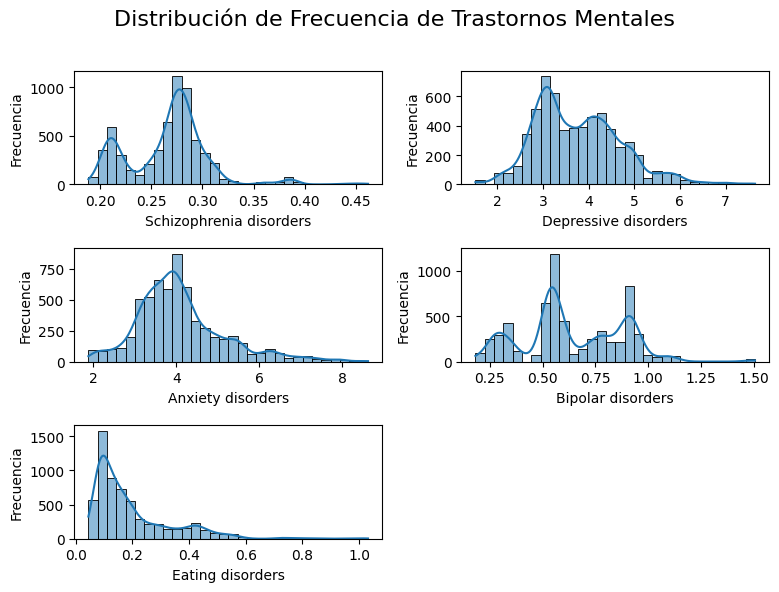

In [ ]:
# Crear una figura y una cuadrícula de 3x2 para los gráficos
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

# Bucle para crear histogramas
for i, column in enumerate(df_country.columns[3:8]):
    row = i // 2
    col = i % 2
    sns.histplot(df_country[column], kde=True, bins=30, ax=axs[row, col])
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frecuencia')

# Añadir un título general a toda la figura
fig.suptitle('Distribución de Frecuencia de Trastornos Mentales', fontsize=16)
# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.96])
# Eliminar el subplot vacío
fig.delaxes(axs[2, 1])

plt.show()

### 3.1.3 Visualización de Boxplots
<a name="boxplots_paises"></a>

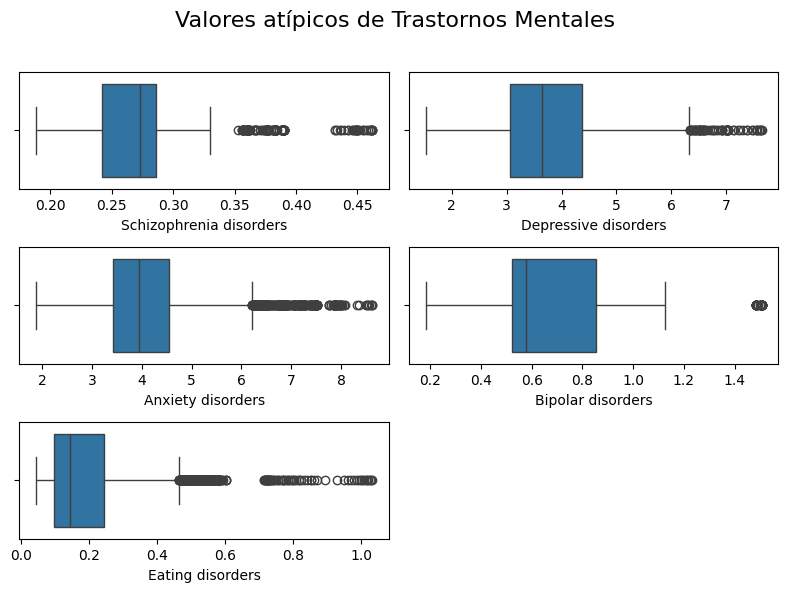

In [ ]:
# Crear una figura y una cuadrícula de 3x2 para los gráficos
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

# Bucle para crear boxplots
for i, column in enumerate(df_country.columns[3:8]):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df_country[column], ax=axs[row, col])
    axs[row, col].set_xlabel(column)

# Añadir un título general a toda la figura
fig.suptitle('Valores atípicos de Trastornos Mentales', fontsize=16)
# Eliminar el subplot vacío
fig.delaxes(axs[2, 1])
# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

### 3.1.4 Evolución temporal
<a name="temporal_paises"></a>

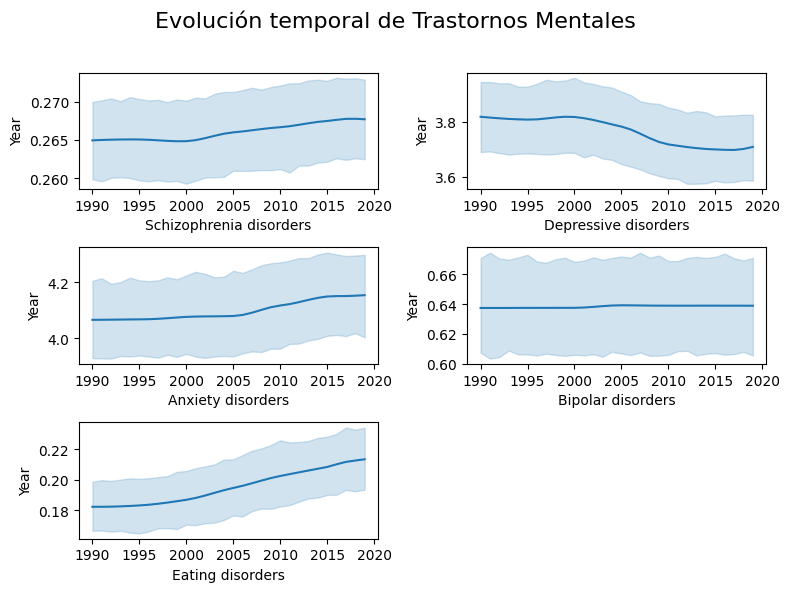

In [ ]:
# Crear una figura y una cuadrícula de 3x2 para los gráficos
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

# Bucle para crear lineplot
for i, column in enumerate(df_country.columns[3:8]):
    row = i // 2
    col = i % 2
    sns.lineplot(x='Year', y=column, data=df_country, ax=axs[row, col])
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Year')

# Añadir un título general a toda la figura
fig.suptitle('Evolución temporal de Trastornos Mentales', fontsize=16)
# Eliminar el subplot vacío
fig.delaxes(axs[2, 1])
# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

### 3.1.5 Mapa de color
<a name="mapa_paises"></a>

In [ ]:


# Crear subplots con tres filas y dos columnas
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=df_country.columns[3:8],
    specs=[
        [{"type": "choropleth"}, {"type": "choropleth"}],
        [{"type": "choropleth"}, {"type": "choropleth"}],
        [{"type": "choropleth"}, {"type": "choropleth"}]
    ],
    horizontal_spacing=0.05,  # Espacio horizontal entre los subplots
    vertical_spacing=0.05,    # Espacio vertical entre los subplots
    )

for i, column in enumerate(df_country.columns[3:8], start=1):
    # Calculamos la media historica de los trastornos depresivos por país
    mean = df_country.groupby('Country')[column].mean().reset_index()

    # Convertir el choropleth en un trace de go.Choropleth
    choropleth_trace = go.Choropleth(
        locations=mean['Country'],
        z=mean[column],
        locationmode='country names',
        colorscale='tempo',
        text=mean['Country'],
        hoverinfo='text+z',
        )

    # Determinar la fila y columna del subplot
    row = (i - 1) // 2 + 1
    col = (i - 1) % 2 + 1

    # Añadir el trace al subplot correspondiente
    fig.add_trace(choropleth_trace, row=row, col=col)

# Personalización del tamaño del mapa, márgenes y del título
fig.update_layout(
    width=1000,
    height=800,
    margin=dict(l=30, r=30, t=90, b=50),  # Ajuste del margen superior para evitar que el título se solape con los mapas de colores
    title=dict(text='<b>Mapa Coroplético de la Media Histórica de los Trastornos Mentales</b>', x=0.5, y=0.95, font=dict(size=20)),
    dragmode=False,
    )
# Personalización barra de color
fig.update_traces(selector=dict(type='choropleth'),
                  colorbar_title= "Incidencia",
                  colorbar_title_side="top",
                  colorbar_len=0.75,
                  colorbar_thickness=15,
                  colorbar_tickvals=[],
                  )
fig.show()

### 3.2. Análisis exploratorio de la prevalencia por región
<a name="eda_region"></a>

### 3.2.1 Datos estadísticos
<a name="estadisticos_region"></a>

In [ ]:
# Datos estadisticos
df_region.describe()

,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2004.500000,0.279650,3.786794,4.173302,0.605131,0.212045
std,8.671515,0.040029,0.497999,0.784238,0.175907,0.121179
min,1990.000000,0.215477,3.085536,3.087365,0.323440,0.077584
25%,1997.000000,0.272388,3.537420,3.598294,0.422466,0.107808
50%,2004.500000,0.277526,3.629344,3.940182,0.606009,0.134228
75%,2012.000000,0.292238,3.997916,4.908868,0.738564,0.306726
max,2019.000000,0.345895,4.760519,5.919647,0.845058,0.416721


### 3.2.2 Visualización de la distribución
<a name="distribucion_region"></a>

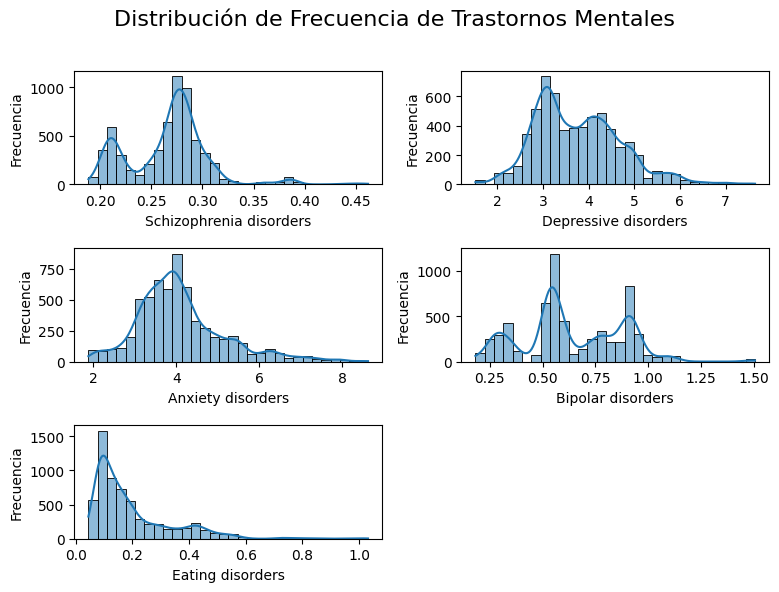

In [ ]:
# Crear una figura y una cuadrícula de 3x2 para los gráficos
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

# Bucle para crear histogramas
for i, column in enumerate(df_region.columns[2:7]):
    row = i // 2
    col = i % 2
    sns.histplot(df_country[column], kde=True, bins=30, ax=axs[row, col])
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frecuencia')

# Añadir un título general a toda la figura
fig.suptitle('Distribución de Frecuencia de Trastornos Mentales', fontsize=16)
# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.96])
# Eliminar el subplot vacío
fig.delaxes(axs[2, 1])

plt.show()

### 3.2.3 Visualización de Boxplots
<a name="boxplots_region"></a>


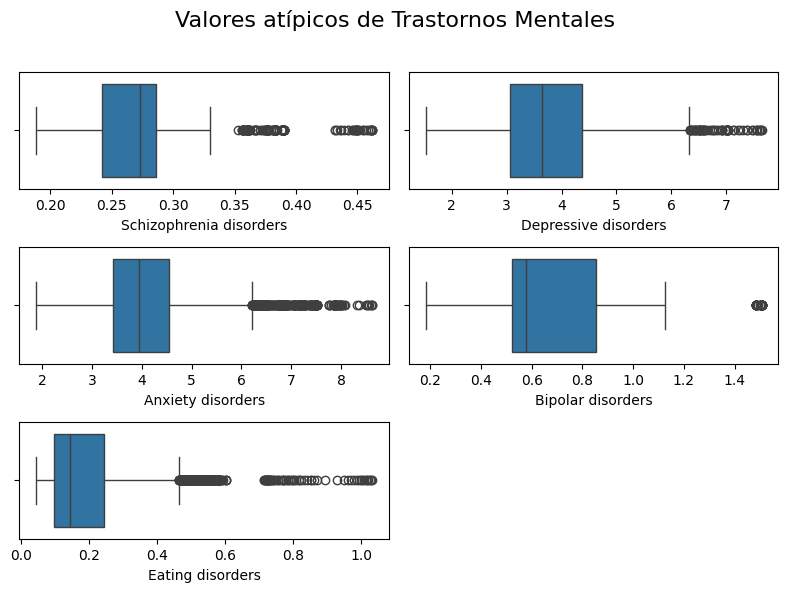

In [ ]:
# Crear una figura y una cuadrícula de 3x2 para los gráficos
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

# Bucle para crear boxplots
for i, column in enumerate(df_region.columns[2:7]):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df_country[column], ax=axs[row, col])
    axs[row, col].set_xlabel(column)

# Añadir un título general a toda la figura
fig.suptitle('Valores atípicos de Trastornos Mentales', fontsize=16)
# Eliminar el subplot vacío
fig.delaxes(axs[2, 1])
# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

### 3.2.4 Evolución temporal
<a name="temporal_region"></a>

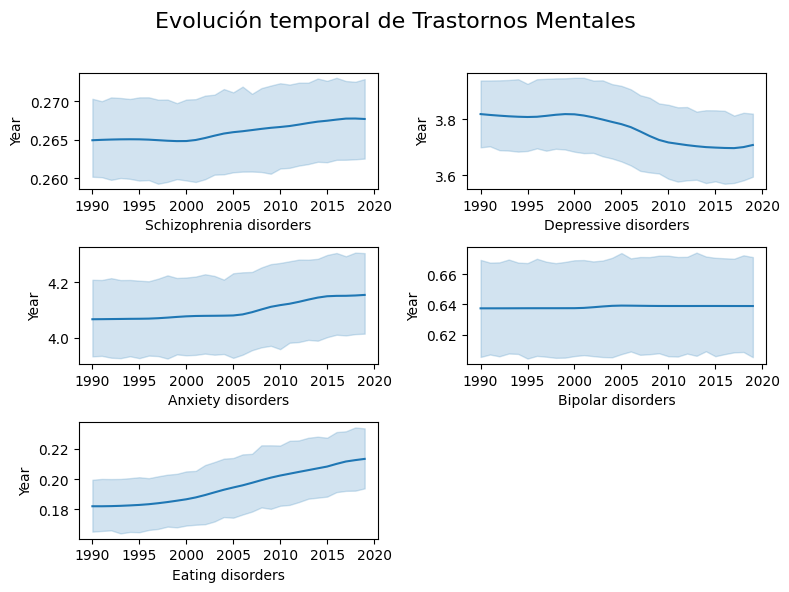

In [ ]:
# Crear una figura y una cuadrícula de 3x2 para los gráficos
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

# Bucle para crear lineplot
for i, column in enumerate(df_country.columns[3:8]):
    row = i // 2
    col = i % 2
    sns.lineplot(x='Year', y=column, data=df_country, ax=axs[row, col])
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Year')

# Añadir un título general a toda la figura
fig.suptitle('Evolución temporal de Trastornos Mentales', fontsize=16)
# Eliminar el subplot vacío
fig.delaxes(axs[2, 1])
# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

## 4. Análisis bivariado
<a name="analisis_bivariado"></a>

### 4.1. Análisis de correlación de los trastornos por paises
<a name="correlacion_paises"></a>

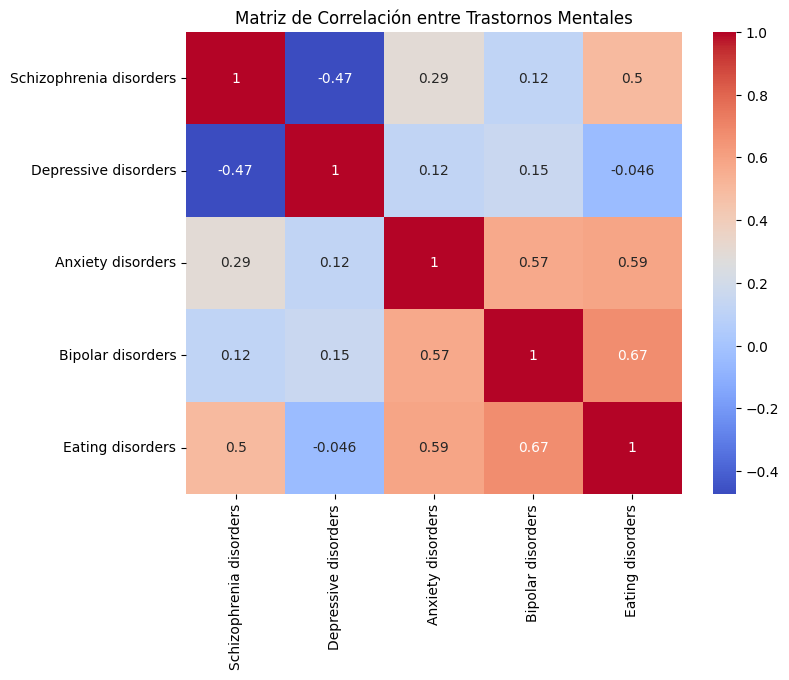

In [ ]:
# Matriz de correlación
correlation_matrix = df_country[df_country.columns[3:]].corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Trastornos Mentales')
plt.show()

### 4.1.1. Valores de correlación entre el trastorno bipolar y los trastornos alimenticios
<a name="correlacion_bipo_alim"></a>





In [ ]:
# Correlación
correlation = df_country['Eating disorders'].corr(df_country['Bipolar disorders'])
print("Correlación de Pearson:", correlation)
# Otras medidas de correlación
correlation_spearman = df_country['Eating disorders'].corr(df_country['Bipolar disorders'], method='spearman')
correlation_kendall = df_country['Eating disorders'].corr(df_country['Bipolar disorders'], method='kendall')
print("Correlación de Spearman:", correlation_spearman)
print("Correlación de Kendall:", correlation_kendall)

Correlación de Pearson: 0.6749670096522544
Correlación de Spearman: 0.7367843850189748
Correlación de Kendall: 0.5131661837667716


### 4.1.2. Gráfico de dispersión entre el trastorno bipolar y los trastornos alimenticios
<a name="dispersion_bipo_alim"></a>


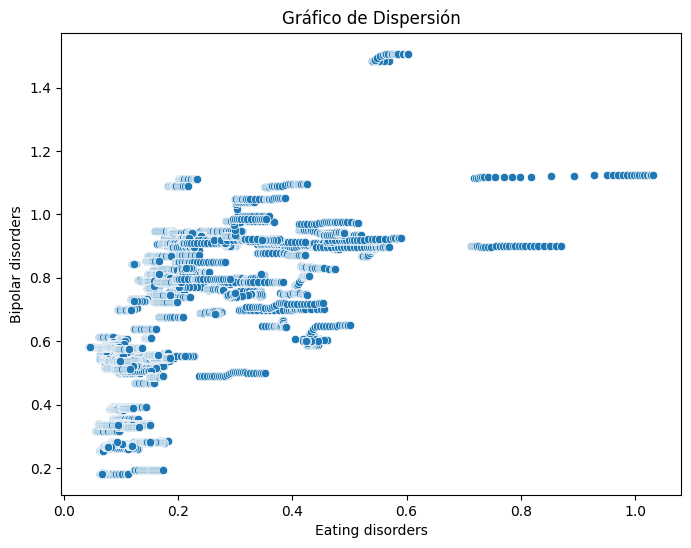

In [ ]:
# Gráfico de Dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Eating disorders', y='Bipolar disorders', data=df_country)
plt.title('Gráfico de Dispersión')
plt.xlabel('Eating disorders')
plt.ylabel('Bipolar disorders')
plt.show()

### 4.1.3. Regresión lineal entre el trastorno bipolar y los trastornos alimenticios
<a name="lineal_bipo_alim"></a>

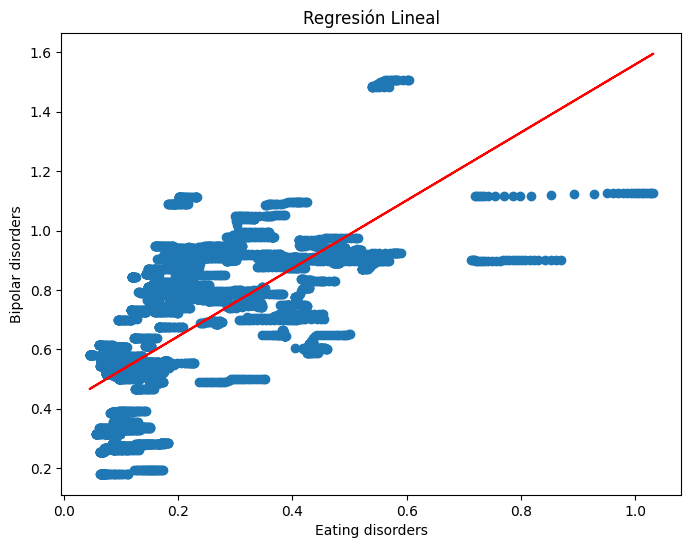

In [ ]:
# Regresión Lineal
model = LinearRegression()
X = df_country[['Eating disorders']]
y = df_country['Bipolar disorders']
model.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title('Regresión Lineal')
plt.xlabel('Eating disorders')
plt.ylabel('Bipolar disorders')
plt.show()

### 4.2. Análisis de correlación de los trastornos por regiones
<a name="correlacion_region"></a>

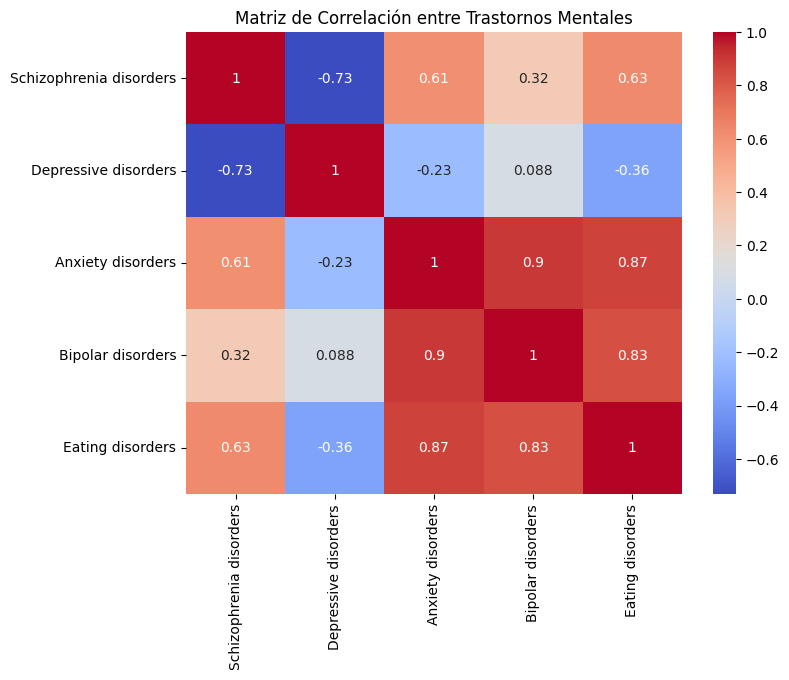

In [ ]:
# Matriz de correlación
correlation_matrix = df_region[df_region.columns[2:]].corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Trastornos Mentales')
plt.show()

### 4.1.1. Valores de correlación entre el trastorno bipolar y los trastornos de ansiedad por regiones
<a name="correlacion_bipo_ansi"></a>

In [ ]:
# Correlación
correlation = df_region['Anxiety disorders'].corr(df_region['Bipolar disorders'])
print("Correlación de Pearson:", correlation)
# Otras medidas de correlación
correlation_spearman = df_region['Anxiety disorders'].corr(df_region['Bipolar disorders'], method='spearman')
correlation_kendall = df_region['Anxiety disorders'].corr(df_region['Bipolar disorders'], method='kendall')
print("Correlación de Spearman:", correlation_spearman)
print("Correlación de Kendall:", correlation_kendall)

Correlación de Pearson: 0.9021873338593046
Correlación de Spearman: 0.9206591768519914
Correlación de Kendall: 0.7477626325209968


### 4.1.2. Gráfico de dispersión entre el trastorno bipolar y los trastornos de ansiedad por regiones
<a name = 'dispersion_bipo_ansi'></a>

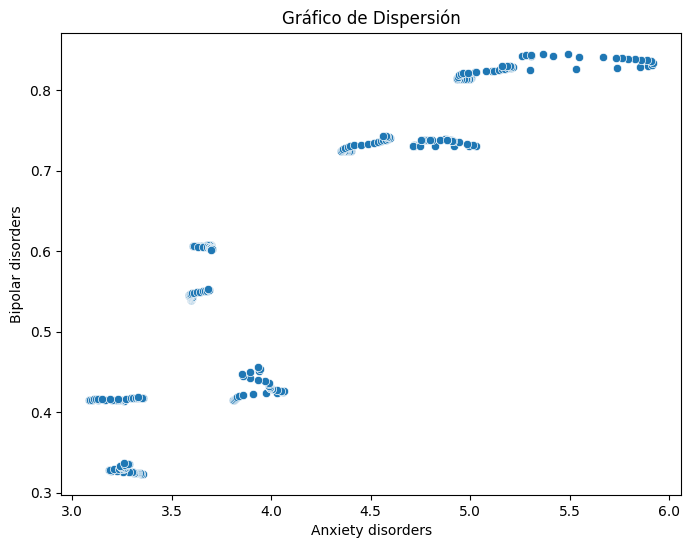

In [ ]:
# Gráfico de Dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Anxiety disorders', y='Bipolar disorders', data=df_region)
plt.title('Gráfico de Dispersión')
plt.xlabel('Anxiety disorders')
plt.ylabel('Bipolar disorders')
plt.show()


### 4.1.3. Regresión lineal entre el trastorno bipolar y los trastornos de ansiedad por regiones
<a name='lineal_bipo_ansi'></a>

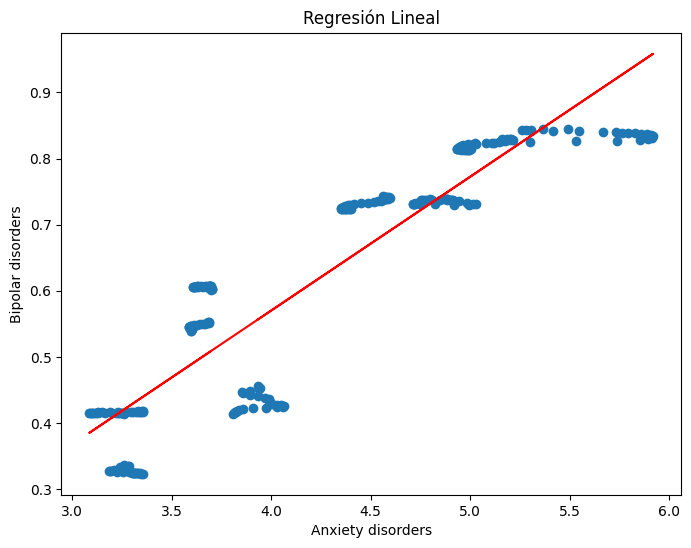

In [ ]:
# Regresión Lineal
model = LinearRegression()
X = df_region[['Anxiety disorders']]
y = df_region['Bipolar disorders']
model.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title('Regresión Lineal')
plt.xlabel('Anxiety disorders')
plt.ylabel('Bipolar disorders')
plt.show()


## 5. Análisis de los datos de Colombia
<a name='analisis_col'></a>

In [ ]:
# Generación del DF con la información de Colombia
df_colombia = df_country[df_country['Country'] == 'Colombia']
df_colombia.head()

,Country,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
1140,Colombia,COL,1990,0.276140,2.414381,4.605985,0.741402,0.180932
1141,Colombia,COL,1991,0.276163,2.421881,4.601091,0.741457,0.181686
1142,Colombia,COL,1992,0.276179,2.430166,4.600316,0.741508,0.183083
1143,Colombia,COL,1993,0.276191,2.437867,4.602611,0.741557,0.184044
1144,Colombia,COL,1994,0.276198,2.448470,4.607154,0.741608,0.184719


### 5.1 Análisis exploratorio de los datos
<a name='eda_col'></a>

### 5.1.1 Datos estadísticos
<a name="estadisticos_col"></a>

In [ ]:
# Datos estadisticos
df_colombia.describe()

,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2004.500000,0.277546,2.403446,4.660421,0.740993,0.195175
std,8.803408,0.001821,0.161479,0.444395,0.000613,0.012253
min,1990.000000,0.276041,2.169340,3.997010,0.739862,0.180932
25%,1997.250000,0.276159,2.221787,4.375151,0.740445,0.186805
50%,2004.500000,0.276199,2.434016,4.646936,0.741192,0.188818
75%,2011.750000,0.279059,2.556898,5.091174,0.741547,0.203363
max,2019.000000,0.281452,2.606664,5.254393,0.741664,0.220843


### 5.1.2. Visualización de la distribución
<a name='distribucion_col'></a>

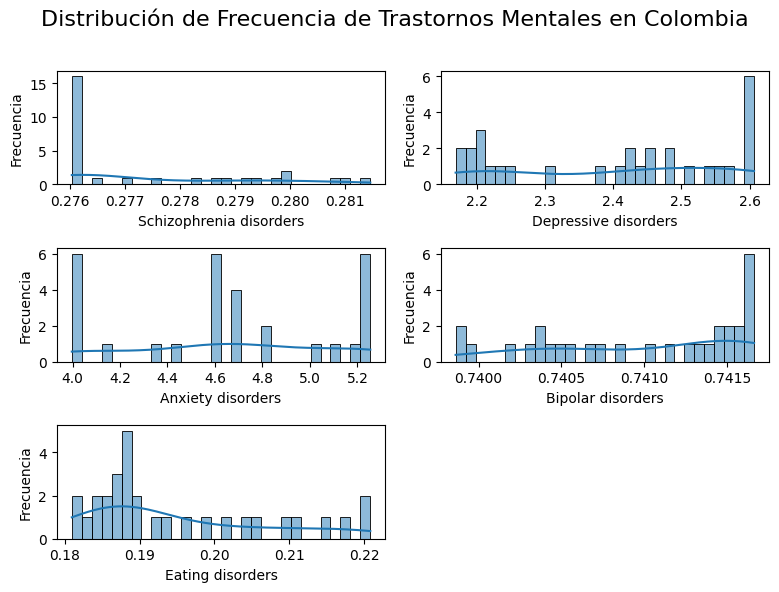

In [ ]:
# Crear una figura y una cuadrícula de 3x2 para los gráficos
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

# Bucle para crear histogramas
for i, column in enumerate(df_colombia.columns[3:8]):
    row = i // 2
    col = i % 2
    sns.histplot(df_colombia[column], kde=True, bins=30, ax=axs[row, col])
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frecuencia')

# Añadir un título general a toda la figura
fig.suptitle('Distribución de Frecuencia de Trastornos Mentales en Colombia', fontsize=16)
# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.96])
# Eliminar el subplot vacío
fig.delaxes(axs[2, 1])

plt.show()

### 5.1.3 Visualización de Boxplots
<a name='boxplots_col'></a>

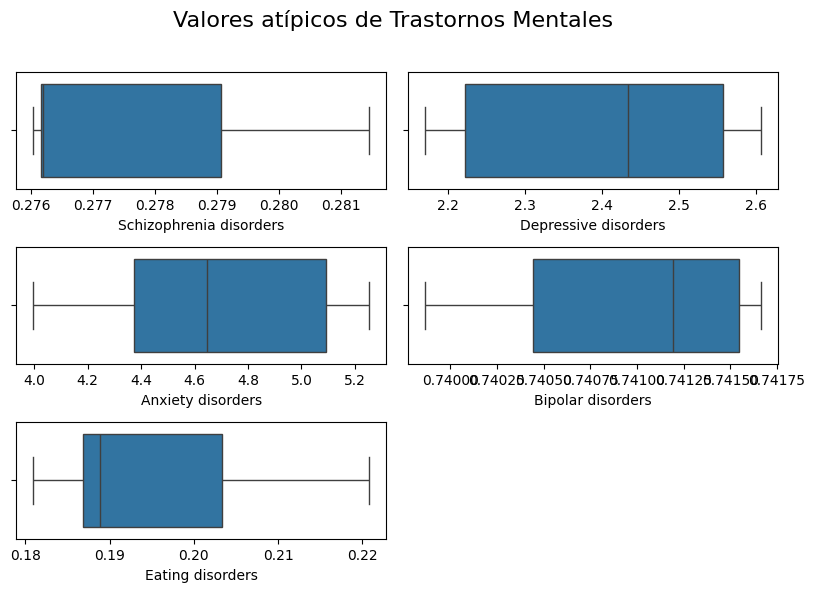

In [ ]:
# Crear una figura y una cuadrícula de 3x2 para los gráficos
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

# Bucle para crear boxplots
for i, column in enumerate(df_colombia.columns[3:8]):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df_colombia[column], ax=axs[row, col])
    axs[row, col].set_xlabel(column)

# Añadir un título general a toda la figura
fig.suptitle('Valores atípicos de Trastornos Mentales', fontsize=16)
# Eliminar el subplot vacío
fig.delaxes(axs[2, 1])
# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

### 5.1.4 Evolución temporal
<a name='temporal_col'></a>

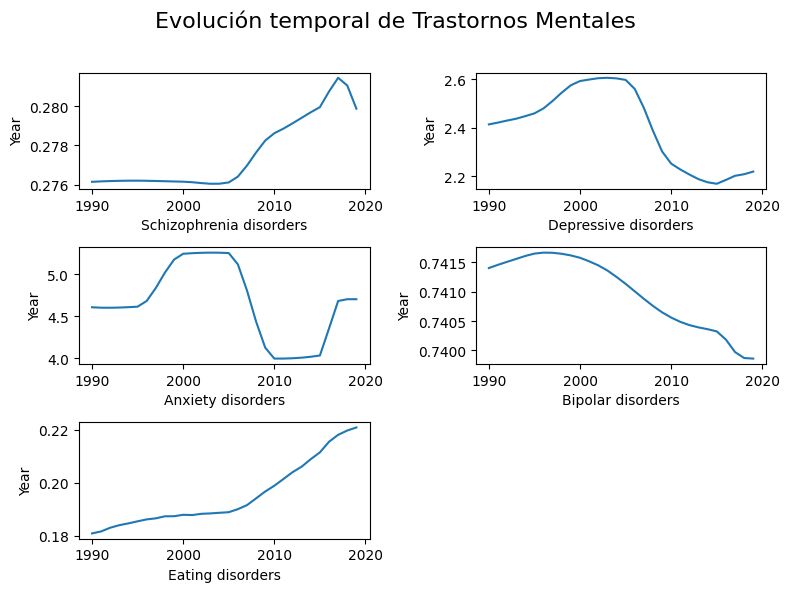

In [ ]:
# Crear una figura y una cuadrícula de 3x2 para los gráficos
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

# Bucle para crear lineplot
for i, column in enumerate(df_colombia.columns[3:8]):
    row = i // 2
    col = i % 2
    sns.lineplot(x='Year', y=column, data=df_colombia, ax=axs[row, col])
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Year')

# Añadir un título general a toda la figura
fig.suptitle('Evolución temporal de Trastornos Mentales', fontsize=16)
# Eliminar el subplot vacío
fig.delaxes(axs[2, 1])
# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

### 5.2 Análisis Bivariado
<a name='bivariado_col'></a>

### 5.2.1 Análisis de correlación de los trastornos en Colombia
<a name='correlacion_col'></a>

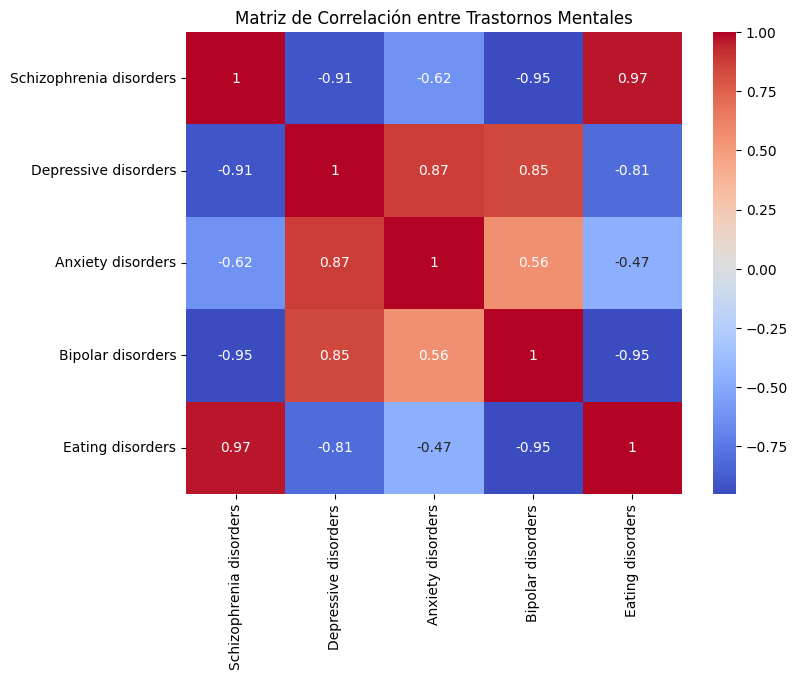

In [ ]:
# Matriz de correlación
correlation_matrix = df_colombia[df_colombia.columns[3:]].corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Trastornos Mentales')
plt.show()

### 5.2.2. Valores de correlación entre el trastorno esquizofrénico y los trastornos alimenticios
<a name='val_correlacion_col'></a>

In [43]:
# Correlación
correlation = df_colombia['Eating disorders'].corr(df_colombia['Schizophrenia disorders'])
print("Correlación de Pearson:", correlation)
# Otras medidas de correlación
correlation_spearman = df_colombia['Eating disorders'].corr(df_colombia['Schizophrenia disorders'], method='spearman')
correlation_kendall = df_colombia['Eating disorders'].corr(df_colombia['Schizophrenia disorders'], method='kendall')
print("Correlación de Spearman:", correlation_spearman)
print("Correlación de Kendall:", correlation_kendall)


Correlación de Pearson: 0.9684927489813185
Correlación de Spearman: 0.7432703003337041
Correlación de Kendall: 0.5678160919540229


### 5.2.3. Gráfico de dispersión entre el trastorno esquizofrénico y los trastornos alimenticios
<a name='dispercion_col'>

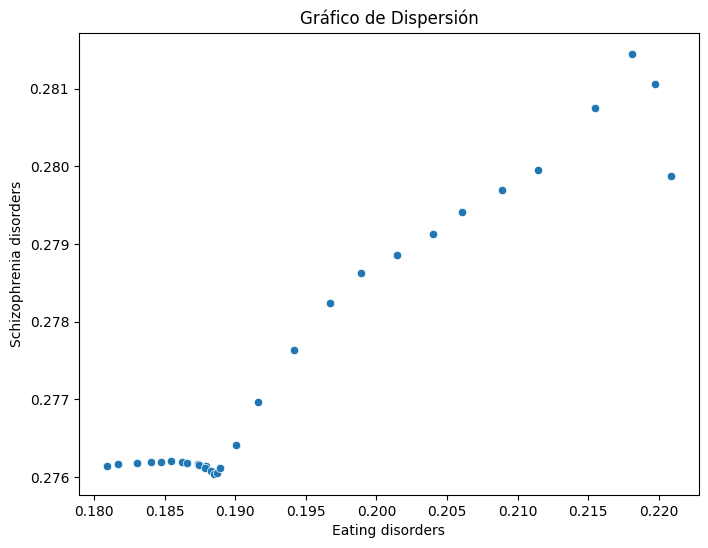

In [44]:
# Gráfico de Dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Eating disorders', y='Schizophrenia disorders', data=df_colombia)
plt.title('Gráfico de Dispersión')
plt.xlabel('Eating disorders')
plt.ylabel('Schizophrenia disorders')
plt.show()

### 5.2.4. Regresión lineal entre los trastorno esquizofrénicos y los trastornos alimenticios
<a name='regresion_col'></a>

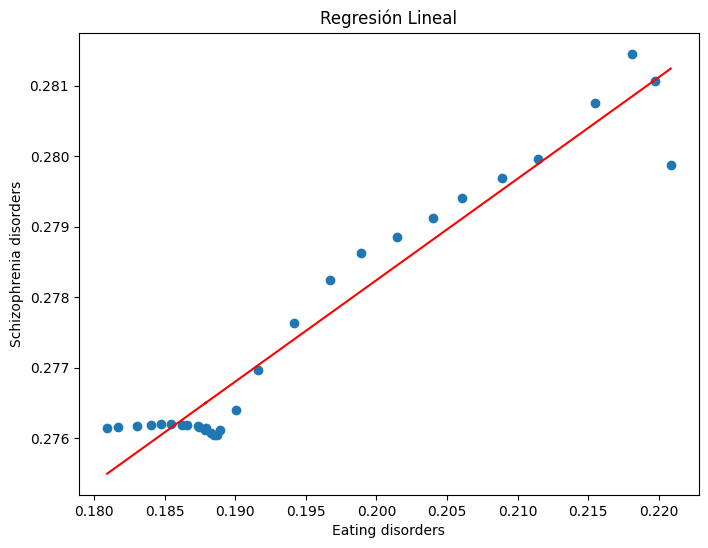

In [45]:
# Regresión Lineal
model = LinearRegression()
X = df_colombia[['Eating disorders']]
y = df_colombia['Schizophrenia disorders']
model.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title('Regresión Lineal')
plt.xlabel('Eating disorders')
plt.ylabel('Schizophrenia disorders')
plt.show()

## 6. Maching learning
<a name='maching_learning'></a>

## 7. Limitaciones
<a name='limitaciones'></a>

## 8. Conclusiones
<a name='conclusiones'></a>